<a href="https://colab.research.google.com/github/MaximilianoMontenegro/PDS/blob/master/Estudio_Filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# incorporación de bibliotecas python

In [ ]:
!python --version

Python 3.10.11


In [ ]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.signal as sgnl

# Incorporación de archivo.csv y muestreo en pantalla

In [ ]:
#Leo el archivo subido a la nuve
url = "/content/drive/MyDrive/Gibio/data.csv"
data = pd.read_csv(url,sep=';')

In [ ]:
#Importo los daros contenidos dentro del archivo.csv
PeriphalSignal = data["PeriphSignal"]
CentralSignal = data["CentralSignal"]
PeriphalPulse = data["PeriphPulse"]
CentralPulse = data["Unnamed: 4"] #Se Elige la columna Unnamed POr la columna CentralPulse, debido a que los datos estan mal colocados

In [ ]:
#Recorto la señal
PulsoPeriferico = PeriphalPulse.iloc[0:103]
PulsoCentral = CentralPulse.iloc[0:103]
t = np.linspace(0,1,103)

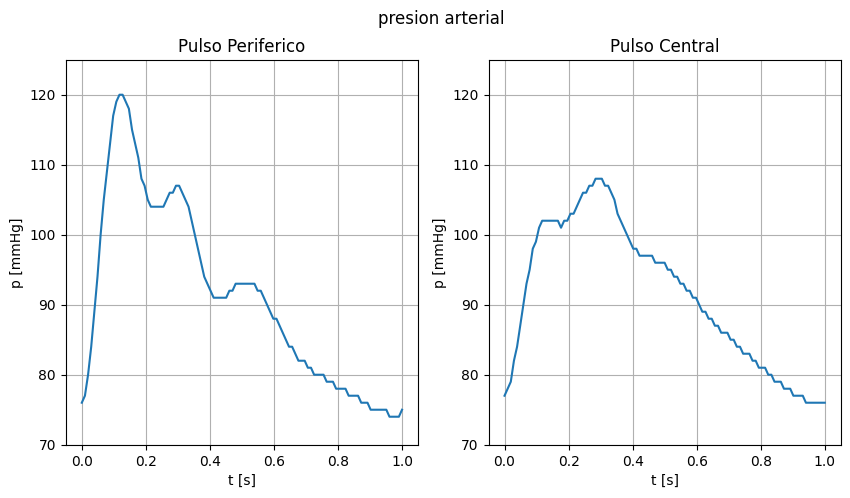

In [ ]:
#Imprimo en pantalla los datos obtenidos
plt.figure(figsize=(10,5))
plt.suptitle("presion arterial")
plt.subplot(1,2,1)
plt.title("Pulso Periferico")
plt.ylabel("p [mmHg]")
plt.xlabel("t [s]")
plt.grid()
plt.plot(t,PulsoPeriferico)
plt.ylim(70,125)
plt.subplot(1,2,2)
plt.title("Pulso Central")
plt.plot(t,PulsoCentral)
plt.ylabel("p [mmHg]")
plt.xlabel("t [s]")
plt.grid()
plt.ylim(70,125)
plt.show()

# implementación de filtros

In [ ]:
#coloco el filtro FIR (Finit Impulse Response) utilizado en arteriometer.py
NUM_FIR =[0.9882,-0.6776, 0.1602, 0.1685, 0.0258,-0.1613, 0.0588, 0.0047,-0.0186, 0.1442,-0.0766, 0.1086, 0.0192,-0.0552, 0.1607,-0.0660, 0.0703, 0.0777,-0.0858, 0.1205,-0.0850, 0.0191, 0.0776,-0.1002, 0.1376,-0.0292,-0.0125, 0.0860,-0.1122, 0.0651, 0.0120,-0.0637, 0.0720,-0.0168,-0.0122]
DEN_FIR = [1]


In [ ]:
#   Componentes de segundo orden

NUM_II = [0.602774074,-1.115393435,0.532267869];
DEN_II = [1,-1.779033714,0.799264245];

#   Componentes de tercer orden

NUM_III = [0.536243823,-0.399888063,-0.622628542,0.524907069]
DEN_III = [1,-1.016003194,-0.527154058,0.582715109]

#   Componentes de quinto orden

NUM_V = [0.608400619,-1.570588012,0.964421698,0.855585685,-1.303043647,0.454941193]
DEN_V = [1,-2.530675831,1.523795318,1.311708242,-1.946314536,0.651421626]



In [ ]:
#Obtengo la media de pulsoMEriferico
media = np.mean(PulsoPeriferico)
#Aplico la transferencia NUM_FIR/DEN_FIR 
CentralPulseObt = sgnl.lfilter(NUM_FIR,DEN_FIR,PulsoPeriferico - media)
CentralPulseObtII = sgnl.lfilter(NUM_II,DEN_II,PulsoPeriferico - media)
CentralPulseObtIII = sgnl.lfilter(NUM_III,DEN_III,PulsoPeriferico - media)
CentralPulseObtV = sgnl.lfilter(NUM_V,DEN_V,PulsoPeriferico - media)
#sumo el valor de la media a cada 
CentralPulseObt+=media
CentralPulseObtII+=media
CentralPulseObtIII+=media
CentralPulseObtV+=media

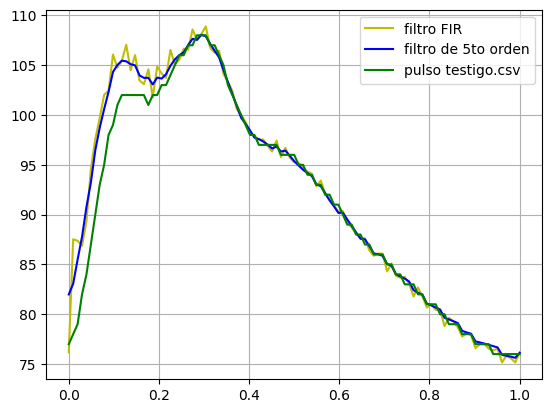

In [ ]:
plt.plot(t,CentralPulseObt,'y',label='filtro FIR')
plt.plot(t,CentralPulseObtV,'b',label='filtro de 5to orden')
plt.plot(t,PulsoCentral,'g',label='pulso testigo.csv')
plt.legend(loc='best')
plt.grid()
plt.show()

# Lectura de las otras mediciones.csv

In [ ]:
#obtengo los diferentes datos de los archivos.csv
#los led de la carpeta
urlArt_Rad25 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_25.csv"
urlArt_Rad35 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_35.csv"
urlArt_Rad45 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_45.csv"
urlArt_Rad55 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_55.csv"
urlArt_Rad65 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_65.csv"
urlArt_Rad75 = "/content/drive/MyDrive/Gibio/señales/pwdb/PRadial_75.csv"

#los abro y los almaceno
dataArt_Rad25 = pd.read_csv(urlArt_Rad25)
dataArt_Rad35 = pd.read_csv(urlArt_Rad35)
dataArt_Rad45 = pd.read_csv(urlArt_Rad45)
dataArt_Rad55 = pd.read_csv(urlArt_Rad55)
dataArt_Rad65 = pd.read_csv(urlArt_Rad65)
dataArt_Rad75 = pd.read_csv(urlArt_Rad75)

#obtengo los datos y los coloco dentro de un vector
pr_Art_Rad_25 = dataArt_Rad25["63.8169204230106"]
pr_Art_Rad_35 = dataArt_Rad35["72.4101102527563"]
pr_Art_Rad_45 = dataArt_Rad45["83.1688292207305"]
pr_Art_Rad_55 = dataArt_Rad55["70.2787819695492"]
pr_Art_Rad_65 = dataArt_Rad65["75.7383934598365"]
pr_Art_Rad_75 = dataArt_Rad75["53.5630390759769"]

In [ ]:
#defino el parámetro tiempo, todos poseen distinto tamaño
t25 = np.linspace(0,1,pr_Art_Rad_25.size) #arteria radial 25 años 
t35 = np.linspace(0,1,pr_Art_Rad_35.size) #               35 años
t45 = np.linspace(0,1,pr_Art_Rad_45.size) #               45 años
t55 = np.linspace(0,1,pr_Art_Rad_55.size) #               55 años
t65 = np.linspace(0,1,pr_Art_Rad_65.size) #               65 años
t75 = np.linspace(0,1,pr_Art_Rad_75.size) #               75 años

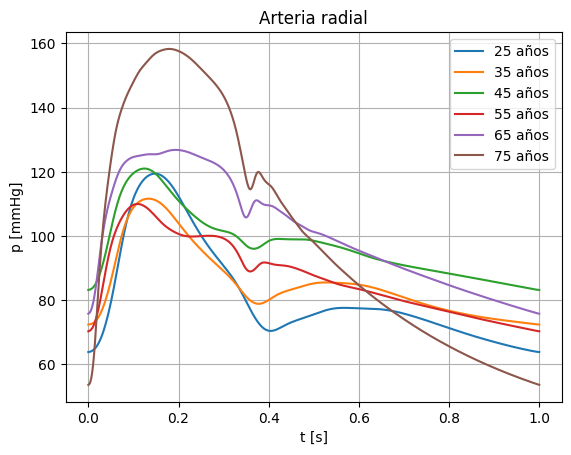

In [ ]:
plt.title('Arteria radial')
plt.plot(t25,pr_Art_Rad_25,label='25 años')
plt.plot(t35,pr_Art_Rad_35,label='35 años')
plt.plot(t45,pr_Art_Rad_45,label='45 años')
plt.plot(t55,pr_Art_Rad_55,label='55 años')
plt.plot(t65,pr_Art_Rad_65,label='65 años')
plt.plot(t75,pr_Art_Rad_75,label='75 años')
plt.ylabel('p [mmHg]')
plt.xlabel('t [s]')
plt.legend(loc='best')
plt.grid()
plt.show()

# Aplicación de los filtros a las nuevas mediciones

In [ ]:
#Obtención de las medias en las muestras
media25 = np.mean(pr_Art_Rad_25)
media35 = np.mean(pr_Art_Rad_35)
media45 = np.mean(pr_Art_Rad_45)
media55 = np.mean(pr_Art_Rad_55)
media65 = np.mean(pr_Art_Rad_65)
media75 = np.mean(pr_Art_Rad_75)

In [ ]:
# aplicación de los filtros Fir
prArt25_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_25 - media25)
prArt35_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_35 - media35)
prArt45_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_45 - media45)
prArt55_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_55 - media55)
prArt65_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_65 - media65)
prArt75_Fir = sgnl.lfilter(NUM_FIR,DEN_FIR,pr_Art_Rad_75 - media75)
# sumo el promedio a las señales
prArt25_Fir+=media25
prArt35_Fir+=media35
prArt45_Fir+=media45
prArt55_Fir+=media65
prArt65_Fir+=media65
prArt75_Fir+=media75

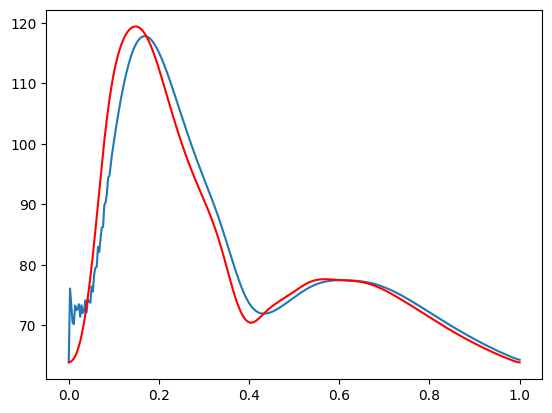

In [ ]:
plt.plot(t25,prArt25_Fir)
plt.plot(t25,pr_Art_Rad_25,'r')
plt.show()